In [ ]:
!pip install -q pandas seaborn numpy matplotlib langdetect

In [11]:
import requests
import pandas as pd

url = 'https://hub.snapshot.org/graphql'

headers = {
    'Content-Type': 'application/json'
}

payload = {
    'query': ""
}

def request(query:str):
    payload['query'] = query
    response = requests.post(url, headers=headers, json=payload)
    return response

In [12]:
from api_util import DAO, TOP20
dao = DAO()

# Space

In [97]:
result = []
for i in range(0, 90000, 1000):
    query = dao.fetch_spaces(i)
    response = request(query)
    result += response.json()["data"]["spaces"]
    print(i, len(result))

df = pd.DataFrame(result)
df.to_excel('spaces.xlsx', index=False, engine='xlsxwriter')

0 1000
1000 2000
2000 3000
3000 4000
4000 5000
5000 6000
6000 7000
7000 8000
8000 9000
9000 10000
10000 11000
11000 12000
12000 13000
13000 14000
14000 15000
15000 16000
16000 17000
17000 18000
18000 19000
19000 20000
20000 21000
21000 22000
22000 23000
23000 24000
24000 25000
25000 26000
26000 27000
27000 28000
28000 29000
29000 30000
30000 31000
31000 32000
32000 33000
33000 34000
34000 35000
35000 36000
36000 37000
37000 38000
38000 39000
39000 40000
40000 41000
41000 42000
42000 43000
43000 44000
44000 45000
45000 46000
46000 47000
47000 48000
48000 49000
49000 50000
50000 51000
51000 52000
52000 53000
53000 54000
54000 55000
55000 56000
56000 57000
57000 58000
58000 59000
59000 60000
60000 61000
61000 62000
62000 63000
63000 64000
64000 65000
65000 66000
66000 67000
67000 68000
68000 69000
69000 70000
70000 71000
71000 72000
72000 73000
73000 74000
74000 75000
75000 76000
76000 77000
77000 78000
78000 79000
79000 80000
80000 81000
81000 82000
82000 83000
83000 84000
84000 85000
85

In [98]:
print(df.columns)

Index(['created', 'id', 'name', 'skin', 'rank', 'about', 'terms', 'email',
       'turbo', 'boost', 'avatar', 'github', 'symbol', 'domain', 'admins',
       'voting', 'parent', 'private', 'website', 'twitter', 'network',
       'members', 'filters', 'plugins', 'flagged', 'location', 'children',
       'template', 'verified', 'coingecko', 'strategies', 'moderators',
       'categories', 'validation', 'treasuries', 'votesCount', 'guidelines',
       'hibernated', '__typename', 'votesCount7d', 'voteValidation',
       'proposalsCount', 'followersCount', 'activeProposals',
       'delegationPortal', 'proposalsCount7d', 'followersCount7d'],
      dtype='object')


In [99]:
print(df.shape)

print(df[df["votesCount"]>1000].shape)

print(df[df["proposalsCount"]>100].shape)

print(df[df["followersCount"]>1000].shape)

print(df[df["followersCount"]>1000].loc[df["proposalsCount"]>20].shape)

(87795, 47)
(775, 47)
(318, 47)
(288, 47)
(171, 47)


In [100]:
for t in TOP20:
    if not df[df["id"]== t].empty:
        print(t)
        print(df[df["id"]== t].shape)
        print(df[df["id"]== t][["proposalsCount", "followersCount", "votesCount"]])

0xgov.eth
(1, 47)
      proposalsCount  followersCount  votesCount
1266              27            2023        2098
1inch.eth
(1, 47)
      proposalsCount  followersCount  votesCount
1027              61           13428       11914
aave.eth
(1, 47)
      proposalsCount  followersCount  votesCount
1087             663          148831     3128667
aavegotchi.eth
(1, 47)
    proposalsCount  followersCount  votesCount
48             509           85774      409593
arbitrumfoundation.eth
(1, 47)
       proposalsCount  followersCount  votesCount
13714             295          313277     5285417
badgerdao.eth
(1, 47)
    proposalsCount  followersCount  votesCount
44             117           10526       72204
balancer.eth
(1, 47)
      proposalsCount  followersCount  votesCount
1505             810           34052      123061
comp-vote.eth
(1, 47)
     proposalsCount  followersCount  votesCount
388               8            7154        2304
cvx.eth
(1, 47)
      proposalsCount  followersCount

# Proposal

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel('spaces.xlsx')
df.shape

(87795, 47)

In [107]:
df_cut = df[df["proposalsCount"]>20].loc[df["followersCount"]>100]
print(df_cut["votesCount"].quantile(0.1))
df_cut = df_cut[df_cut["votesCount"]>df_cut["votesCount"].quantile(0.1)]
df_cut.shape

188.60000000000002


(552, 47)

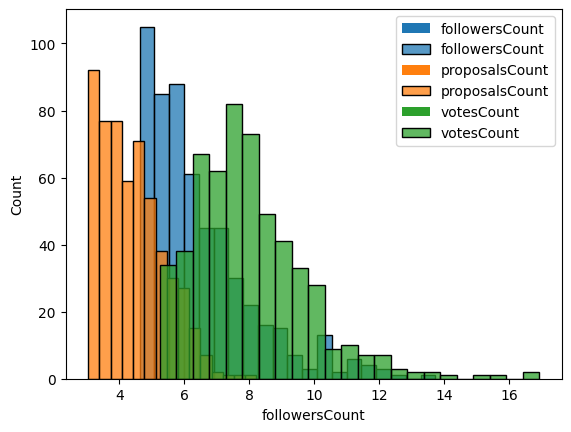

In [108]:
df_cut.to_excel('spaces_cut.xlsx', index=False, engine='xlsxwriter')
sns.histplot(df_cut['followersCount'].apply(np.log), label="followersCount")
sns.histplot(df_cut['proposalsCount'].apply(np.log), label="proposalsCount")
sns.histplot(df_cut['votesCount'].apply(np.log), label="votesCount")
plt.legend()

In [109]:
result = []
spaces = df_cut['id'].tolist()

failed_space = []
for i, space in enumerate(spaces):
    print(i, space)
    idx = 0
    while True:
        query = dao.fecth_proposals(space, idx)
        response = request(query).json()
        if 'error' in response.keys():
            print(response)
            failed_space.append(space)
            continue
        response = response["data"]["proposals"]
        if response:
            result += response
            print(len(response), len(result))
            idx += 1000
        else:
            break

0 fabien.eth
418 418
1 idlefinance.eth
119 537
2 dodobird.eth
23 560
3 decentralgames.eth
267 827
4 badgerdao.eth
117 944
5 yam.eth
215 1159
6 aavegotchi.eth
514 1673
7 baovotes.eth
81 1754
8 unidexapp.eth
65 1819
9 xdaistake.eth
257 2076
10 truefigov.eth
78 2154
11 frax.eth
461 2615
12 nftx.eth
81 2696
13 ndx.eth
51 2747
14 friendswithbenefits.eth
79 2826
15 vote-perp.eth
38 2864
16 barnbridge.eth
32 2896
17 cream-finance.eth
112 3008
18 stakedao.eth
109 3117
19 defigeek.eth
83 3200
20 community.nexusmutual.eth
63 3263
21 vote.airswap.eth
112 3375
22 metafactory.eth
64 3439
23 lido-snapshot.eth
318 3757
24 stabilize-governance.eth
37 3794
25 opiumprotocol.eth
86 3880
26 gov.dhedge.eth
89 3969
27 diadao.eth
99 4068
28 premia.eth
45 4113
29 alchemistcoin.eth
21 4134
30 snapshot.floatprotocol.eth
61 4195
31 gnosis.eth
196 4391
32 alpacafinance.eth
48 4439
33 tokenlon.eth
45 4484
34 alchemixstakers.eth
130 4614
35 tracer.eth
46 4660
36 snxgov.eth
853 5513
37 insuretoken.eth
111 5624
38 qu

In [110]:
from datetime import datetime

df_proposals = pd.DataFrame(result) # 'strategies', 'validation'

# data cleansing: {space: {id}} -> {space_id}
df_proposals["space_id"] = df_proposals["space"].apply(lambda x: x["id"])
del df_proposals["space"]

# data cleansing: 1722174165 -> datatime(2024-07-28 22:42:??)
for v in ['start', 'end', 'created']:
    df_proposals[v] = df_proposals[v].apply(datetime.fromtimestamp)

print(df_proposals.shape, df_proposals.columns)

(78979, 33) Index(['id', 'end', 'app', 'ipfs', 'type', 'body', 'link', 'title', 'start',
       'state', 'votes', 'author', 'symbol', 'quorum', 'scores', 'created',
       'updated', 'network', 'plugins', 'choices', 'privacy', 'flagged',
       'snapshot', 'strategies', 'validation', 'discussion', 'quorumType',
       '__typename', 'scores_state', 'scores_total', 'scores_updated',
       'scores_by_strategy', 'space_id'],
      dtype='object')


In [111]:
df_proposals.head()

,id,end,app,ipfs,type,body,link,title,start,state,...,strategies,validation,discussion,quorumType,__typename,scores_state,scores_total,scores_updated,scores_by_strategy,space_id
0,0xd77a8cf8575bdc4bd22f008c24e44b4f130d600b11ee...,2024-08-10 05:43:01,snapshot-v-2,bafkreif5juzrnhpw3ne6sh3vz4z7pl4iagi7tj5ubm4c2...,basic,,https://snapshot.org/#/fabien.eth/proposal/0xd...,Test proposal,2024-08-10 04:43:01,closed,...,"[{'network': '1', 'params': {'symbol': 'ETH'}}]",{'params': {}},,default,Proposal,final,0.284466,1723236196,"[[0], [0.2844664907898591], [0]]",fabien.eth
1,0x72f473f257c9730ae959a0f268580a17c514edcecdc2...,2024-08-08 20:17:37,snapshot-v-2,bafkreicirzyfobjz4uqpdx3risae3dng33l7z4joupnmr...,basic,,https://snapshot.org/#/fabien.eth/proposal/0x7...,Test proposal with execution,2024-08-08 19:17:37,closed,...,"[{'network': '1', 'params': {'symbol': 'ETH'}}]",{'params': {}},,default,Proposal,final,0.284466,1723115875,"[[0.2844664907898591], [0], [0]]",fabien.eth
2,0xe887785955da0967828c15c34922287b051d00c237b0...,2024-08-07 19:23:15,snapshot-v-2,bafkreiercujbijibwxqlovv7aucffi56nm3kmbrrazguf...,basic,,https://snapshot.org/#/fabien.eth/proposal/0xe...,Test proposal,2024-08-07 18:23:15,closed,...,"[{'network': '1', 'params': {'symbol': 'ETH'}}]",{'params': {}},,default,Proposal,final,0,1723026213,"[[0], [0], [0]]",fabien.eth
3,0xc4697cca0148a2178b6687059fd846b60889beb3e526...,2024-08-05 23:25:15,snapshot-v-2,bafkreicu5a7ehvl4b53ob6uytj4akfm7o43ictp35n4bo...,basic,,https://snapshot.org/#/fabien.eth/proposal/0xc...,Test proposal 2,2024-08-05 22:25:15,closed,...,"[{'network': '1', 'params': {'symbol': 'ETH'}}]",{'params': {}},,default,Proposal,final,0,1722867925,"[[0], [0], [0]]",fabien.eth
4,0xeadee7de89dfa66e78ad94594b0c8f5644f5163e477f...,2024-08-05 23:22:38,snapshot-v-2,bafkreibl7zzc6ocgw2pbnpwl5ewxbz62zlzcekrn76mgi...,basic,,https://snapshot.org/#/fabien.eth/proposal/0xe...,Test proposal,2024-08-05 22:22:38,closed,...,"[{'network': '1', 'params': {'symbol': 'ETH'}}]",{'params': {}},,default,Proposal,final,0.285126,1722867773,"[[0.28512600073476874], [0], [0]]",fabien.eth


In [112]:
# df_proposals의 start에서 2024년 이후의 데이터가 존재하는 space만 추출

temp = df_proposals[df_proposals['start'] >= pd.to_datetime('2024-01-01')]
spaces = temp["space_id"].unique()
print(len(spaces))

df_proposals = df_proposals[df_proposals["space_id"].isin(spaces)]
df_proposals.shape

297


(46380, 33)

In [113]:
# state가 closed인 데이터만 추출
df_proposals = df_proposals[df_proposals['state'] == 'closed']
df_proposals.shape, df_proposals["space_id"].nunique()

((46144, 33), 296)

In [114]:
# title, body 중복 제거
# df_proposals = df_proposals.sort_values(by=["created"])
df_proposals = df_proposals.drop_duplicates(subset=['title', 'body'], keep="last")
print("Drop duplicated in title & body:", df_proposals.shape)

# title, body가 NaN인 데이터 제거
df_proposals = df_proposals.dropna(subset=['title', 'body'])

# title, body가 150자 이상인 데이터만 추출
df_proposals = df_proposals[df_proposals['body'].apply(lambda x: len(str(x)) >= 150)]
print("Over 150 body length:", df_proposals.shape)
df_proposals["space_id"].nunique()

Drop duplicated in title & body: (42578, 33)
Over 150 body length: (28728, 33)


266

In [115]:
df_proposals['votes'].describe()

count     28728.000000
mean       1079.387601
std       14992.240949
min           0.000000
25%           9.000000
50%          31.000000
75%         113.000000
max      514470.000000
Name: votes, dtype: float64

In [116]:
# votes가 10개 이상인 데이터만 추출
df_proposals = df_proposals[df_proposals['votes'] > 9]  # 25%
print("Over 10 votes:", df_proposals.shape, df_proposals["space_id"].nunique())
df_proposals['votes'].describe()

Over 10 votes: (21305, 33) 250


count     21305.000000
mean       1454.189392
std       17393.670192
min          10.000000
25%          24.000000
50%          59.000000
75%         186.000000
max      514470.000000
Name: votes, dtype: float64

In [117]:
df_proposals.to_excel('proposals.xlsx', index=False, engine='xlsxwriter')

c:\Python310\lib\site-packages\xlsxwriter\worksheet.py:1251: UserWarning: Ignoring URL 'https://gov.proofofhumanity.id/t/hip-10-phase-2-signaling-create-a-decision-locking-mechanism/598
HIP:%2010
title:%20Create%20a%20decision%20locking%20mechanism
author:%20@Mads
status:%20Signalling
created:%202021-05-16

Abstract
This%20proposal%20suggests%20creating%20a%20decision%20locking%20mechanism%20that%20will%20make%20decisions%20more%20difficult%20to%20reverse%20at%20a%20later%20date.%20This%20locking%20mechanism%20can%20either%20be%20applied%20to%20new%20or%20existing%20decisions.

Motivation
For%20some%20decisions,%20we%20need%20to%20signal%20to%20the%20world%20and%20ourselves%20that%20they%20are%20very%20unlikely%20to%20be%20overturned%20in%20the%20future%20and%20that%20it%20would%20require%20a%20lot%20of%20effort%20to%20do%20so.%20One%20such%20decision%20would%20be%20to,%20for%20instance,%20lock%20the%20$UBI%20issuance%20rate%20to%20ensure%20that%20people%20can%20forecast%20the%20value%

### Remove unnecessary letters

In [135]:
df_proposals = pd.read_excel('proposals.xlsx')
df_proposals.shape

(21305, 34)

In [137]:
import re

def _regex(pattern, text, output=""):
    return re.compile(pattern, re.IGNORECASE).sub(output, text)

def remove_pattern(text):
    if isinstance(text, str):
        for p in [
            r'!\[.*?\]\(.*?\)',                     # image link & alt
            r"[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+", # email
            r"@\w+",                                # @username
            r'http[s]?://\S+|www\.\S+|ipfs://\S+',  # url and ipfs
            r'\b0x\w+\b',                           # wallet address
            r'\(\s*\)', r'\[\s*\]',                 # empty braket
            r'\{\s*\}', r'\<\s*\>',

        ]:
            if text:
                text = _regex(p, text)
            else:
                break
    return text

def change_pattern(text):
    if isinstance(text, str):
        for p in [
            (r'\n+', "\n"),  # multiple enter -> once
            (r'#+', "#"),    # multiple # -> once
            (r'\*+', "*"),   # multiple * -> once
        ]:
            if text:
                text = _regex(p[0], text, p[1])
            else:
                break
    return text

for v in ["title", "body"]:
    df_proposals[v] = df_proposals[v] \
        .apply(remove_pattern) \
        .apply(change_pattern) 

df_proposals = df_proposals.dropna(subset=['title', 'body'])
df_proposals.shape, df_proposals["space_id"].nunique()

((21268, 34), 250)

In [138]:
# body를 언어별로 분류
from langdetect import detect

def detect_lang(x):
    try:
        return detect(str(x))
    except:
        return None

df_proposals["lang"] = df_proposals['body'].apply(detect_lang)
df_proposals["lang"].value_counts()

en       20920
ja         175
es         105
sw           7
pt           7
de           6
zh-cn        6
ca           5
tr           5
vi           5
fr           2
it           2
sv           1
id           1
so           1
no           1
ar           1
nl           1
et           1
Name: lang, dtype: int64

In [139]:
df_proposals.to_excel('proposals_lang.xlsx', index=False, engine='xlsxwriter')

In [2]:
# 영어만 추출
df_proposals = df_proposals[df_proposals["lang"] == "en"]

In [12]:
# 유효한 문자만 추출 ~ 이모티콘 삭제
valid_pattern = re.compile(r'[a-zA-Z0-9!@#$%^&*()_\-+{}\[\]:;≥"\'<>,.?/\\|`~\s]')
def get_valid(text):
    if isinstance(text, str): 
        return ''.join(valid_pattern.findall(text))
    return text  

for v in ["title", "body"]:
    df_proposals[v] = df_proposals[v] \
        .apply(get_valid) 

In [13]:
df_proposals = df_proposals.dropna(subset=['title', 'body'])
df_proposals.shape, df_proposals["space_id"].nunique()

((20918, 34), 245)

In [14]:
df_proposals.to_excel('proposals_preprocess.xlsx', index=False, engine='xlsxwriter')

In [15]:
# df_temp = pd.read_excel('proposals_top20_0730_space_id.xlsx')
# df_temp = df_temp[["id", "Class A", "Class B", "Class C"]]
# df = pd.merge(df_proposals, df_temp, on="id", how="left")
# df.to_excel('proposals_preprocess_0812.xlsx', index=False, engine='xlsxwriter')

# TOP20

In [86]:
import pandas as pd
df_proposals = pd.read_excel('proposals_preprocess.xlsx')

In [113]:
df_proposals_top20 = df_proposals[df_proposals["space_id"].isin(TOP20)]
df_proposals_top20.shape, df_proposals_top20["space_id"].nunique()

((5366, 33), 17)

In [114]:
df_proposals_top20.to_excel('proposals_preprocess_top20.xlsx', index=False, engine='xlsxwriter')